In [48]:
import numpy as np
from scipy import linalg 
import networkx as nx

# Check if adjacency matrix $A$ represents a DAG

Morales-Alvarez et al. (2021) refer to Zhang et al. (2018) to show that an adjacency matrix $A$ represents a [DAG](https://en.wikipedia.org/wiki/Directed_acyclic_graph) iff:

<br>

$$\Large \mathcal{R}(A) = 0$$

where:

$$\large \mathcal{R}(A) = tr(e^{A \odot A}) - d$$

where:

* $A$ is the adjacency matrix of a graph $G$
* $tr(\cdot)$ is a trace of a matrix
* $d$ is a number of nodes in $G$
* $\odot$ is an element-wise product ([Hadamard product](https://en.wikipedia.org/wiki/Hadamard_product_(matrices)))


### References

[Morales-Alvarez et al. - VICause: Simultaneous Missing Value Imputation and Causal Discovery with Groups (2021)](https://arxiv.org/pdf/2110.08223.pdf) 

[Zhang et al. - DAGs with NO TEARS: Continuous Optimization for Structure Learning (2018)](https://arxiv.org/pdf/1803.01422.pdf)

In [49]:
def check_if_dag(graph):
    A = nx.linalg.graphmatrix.adjacency_matrix(graph).todense()
    return np.trace(linalg.expm(A * A)) - A.shape[0] == 0

In [68]:
# Create a graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(np.arange(6))

# Add edges
G.add_edges_from(
    [
        (0, 1),
        (0, 3),
        (0, 5),
        (1, 2),
        (2, 5),
        (3, 4),
        (4, 5)
    ]
)

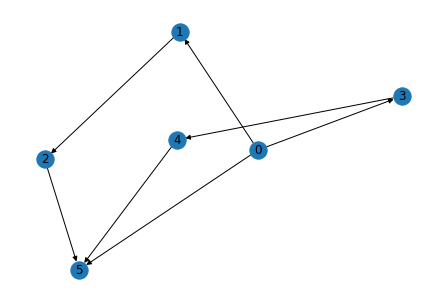

In [69]:
# Plot the graph
nx.draw(G, with_labels=True)

In [70]:
# Get the adjacency matrix
A = nx.linalg.graphmatrix.adjacency_matrix(G).todense()
A

matrix([[0, 1, 0, 1, 0, 1],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0]], dtype=int32)

In [71]:
# Check if G is a DAG
check_if_dag(G)

True